# EDA and Modeling - Cocoa Yield Prediction

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [23]:
# Load data
df = pd.read_csv("../data/cocoa_climate_ikom_2013_2022.csv")
df.head()

,Year,Cocoa_Yield,Rainfall_mm,Min_Temp_C,Max_Temp_C,Solar_Radiation_kwm2,Wind_Speed_ms,Min_RH,Max_RH
0,2013,23320.0,2632.8,23.7,30.1,1880024.5,39.0,64.6,94.0
1,2014,24162.5,2539.4,23.7,30.3,1914054.2,39.3,63.5,94.9
2,2015,20666.3,2537.0,23.4,30.9,1963704.2,41.7,59.7,90.8
3,2016,26680.0,2579.8,23.7,31.1,1926549.5,38.7,61.4,93.1
4,2017,27439.0,2394.9,23.7,31.3,1972441.3,40.9,60.2,94.0


In [24]:
# Basic EDA
print(df.describe())

             Year   Cocoa_Yield  Rainfall_mm  Min_Temp_C  Max_Temp_C  \
count    10.00000     10.000000    10.000000   10.000000   10.000000   
mean   2017.50000  29384.830000  2516.330000   23.760000   30.870000   
std       3.02765   7124.897605   186.351448    0.222111    0.408384   
min    2013.00000  20666.300000  2240.700000   23.400000   30.100000   
25%    2015.25000  24791.875000  2408.050000   23.700000   30.675000   
50%    2017.50000  26893.500000  2538.200000   23.700000   31.000000   
75%    2019.75000  36064.750000  2619.550000   23.850000   31.100000   
max    2022.00000  39813.500000  2837.900000   24.200000   31.300000   

       Solar_Radiation_kwm2  Wind_Speed_ms     Min_RH     Max_RH  
count          1.000000e+01      10.000000  10.000000  10.000000  
mean           1.967018e+06      40.880000  60.600000  93.550000  
std            5.641600e+04       1.704765   2.760837   1.307457  
min            1.880024e+06      38.700000  56.600000  90.800000  
25%            1

In [46]:
features = df.drop(columns=['Year', 'Cocoa_Yield'])

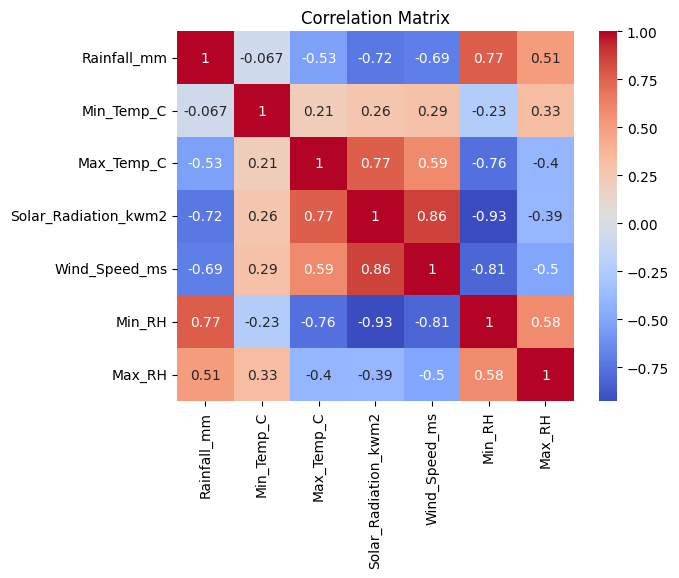

In [47]:
sns.heatmap(features.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [104]:
# Feature Engineering
reduced_features = features.drop(columns=['Min_RH', 'Max_RH', 'Rainfall_mm', 'Wind_Speed_ms', 'Max_Temp_C'])

In [109]:
# Feature-target split
X = reduced_features.copy()
y = df['Cocoa_Yield']

In [110]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [111]:
# Evaluate models
def evaluate(model, X_test, y_test, name):
    pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)
    print(f"{name} → RMSE: {rmse:.2f}, R²: {r2:.2f}")

evaluate(rf, X_test, y_test, "Random Forest")
evaluate(lr, X_test, y_test, "Linear Regression")

Random Forest → RMSE: 5493.01, R²: 0.45
Linear Regression → RMSE: 1660.99, R²: 0.95


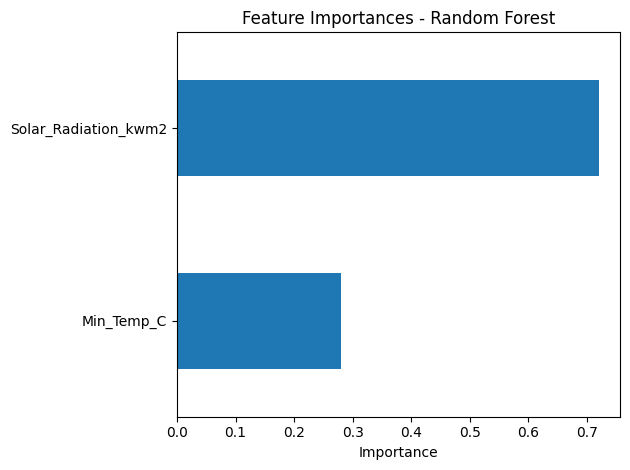

In [112]:
# Feature importance
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh')
plt.title("Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()